# Forecasting Time Series Data with Prophet

#### Import modules

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [2]:
# Resolving conflict (Matplotlib must be registered with Pandas due to a conflict between Prophet and Pandas.)
pd.plotting.register_matplotlib_converters() 

#### Read the data in from the retail_sales.csv file and set the index to the date column.

In [3]:
sales_df = pd.read_csv("retail_sales.csv", index_col='date', parse_dates=True)

#### Pandas dataframe with data looks  like this:

In [4]:
sales_df.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


### Start working with prophet

####  create new data frame with different indexes

In [5]:
df = sales_df.reset_index()

In [6]:
df.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


#### Rename columns as required by prophet

In [7]:
df=df.rename(columns={'date':'ds', 'sales':'y'})

In [8]:
df.head()

,ds,y
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


#### Plot the data using Pandas' plot function

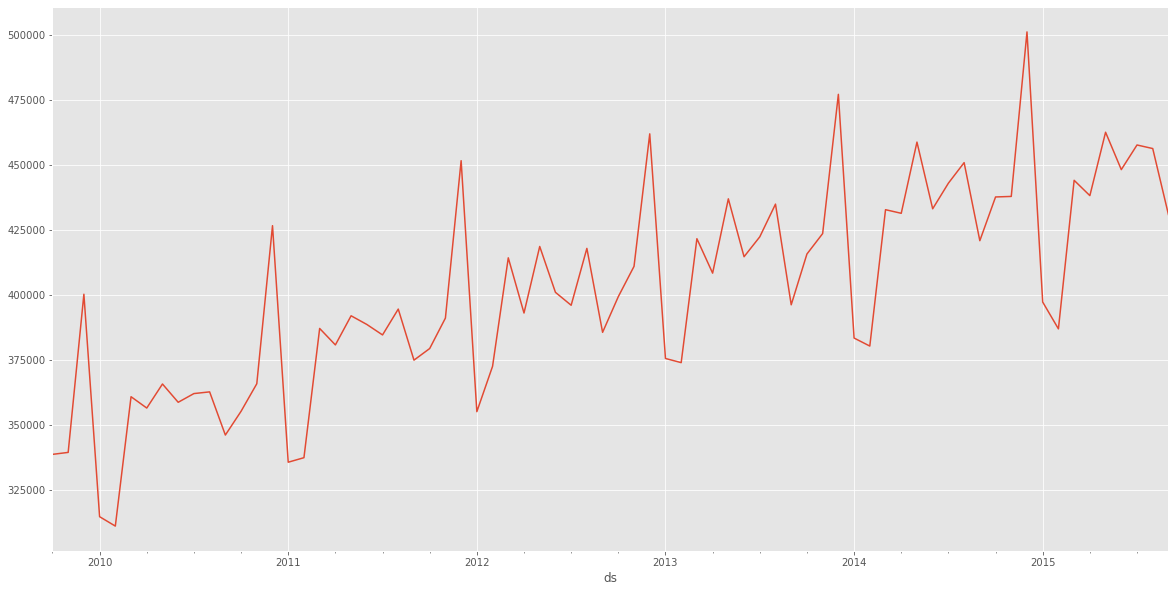

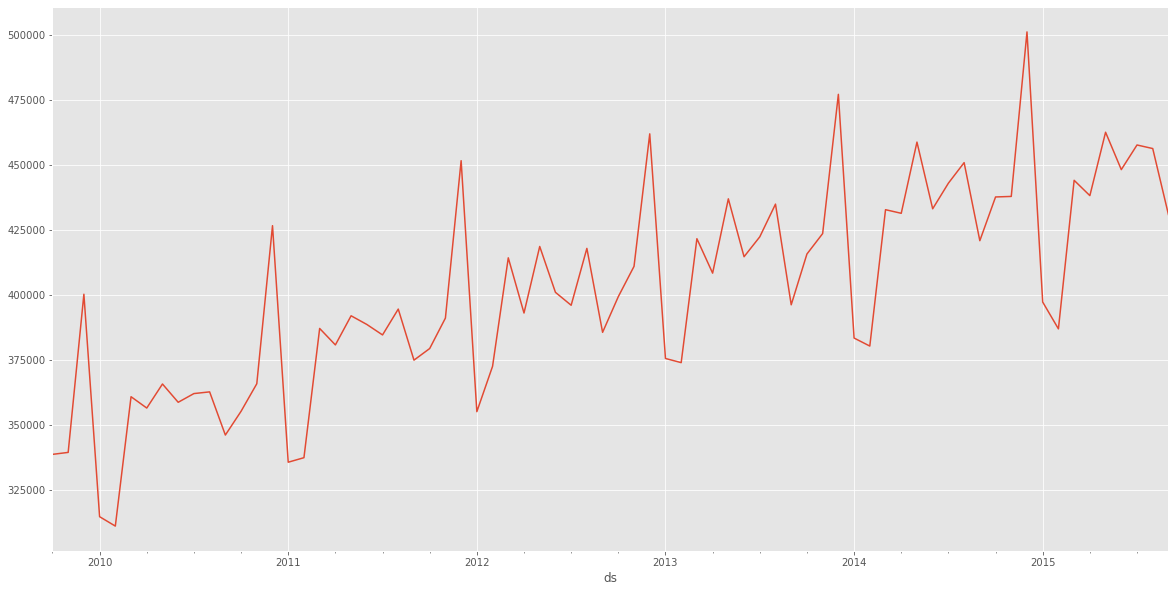

In [9]:
df.set_index('ds').y.plot().get_figure()

In [10]:
#### Numpy's log() to log-transform of our data

In [11]:
df['y'] = np.log(df['y'])

In [12]:
df.tail()

,ds,y
67,2015-05-01,13.044650
68,2015-06-01,13.013060
69,2015-07-01,13.033991
70,2015-08-01,13.030993
71,2015-09-01,12.973671


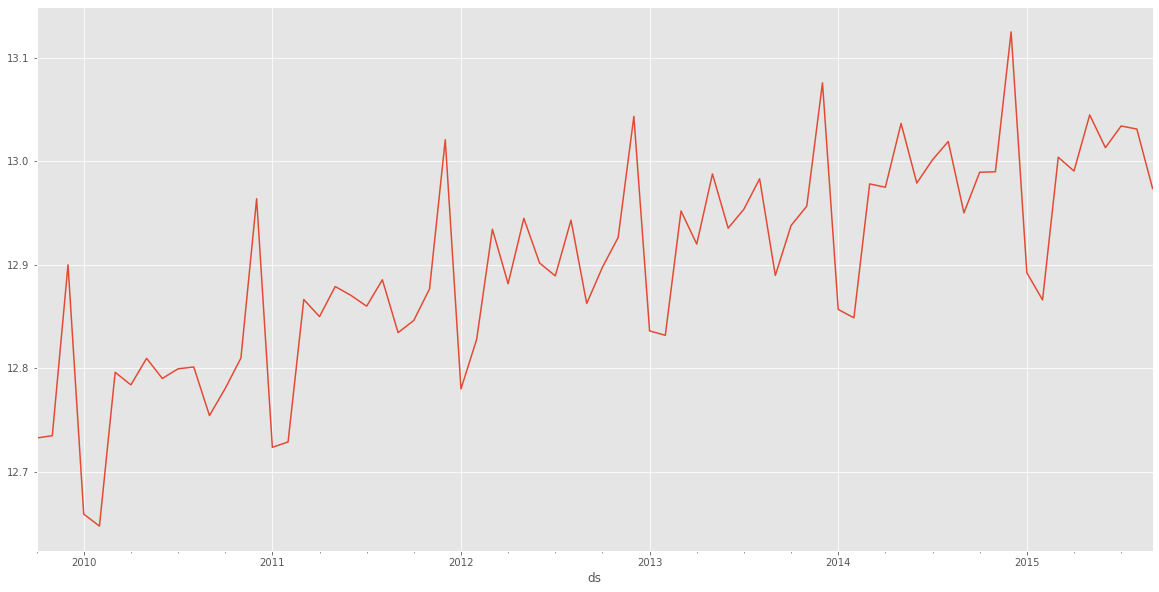

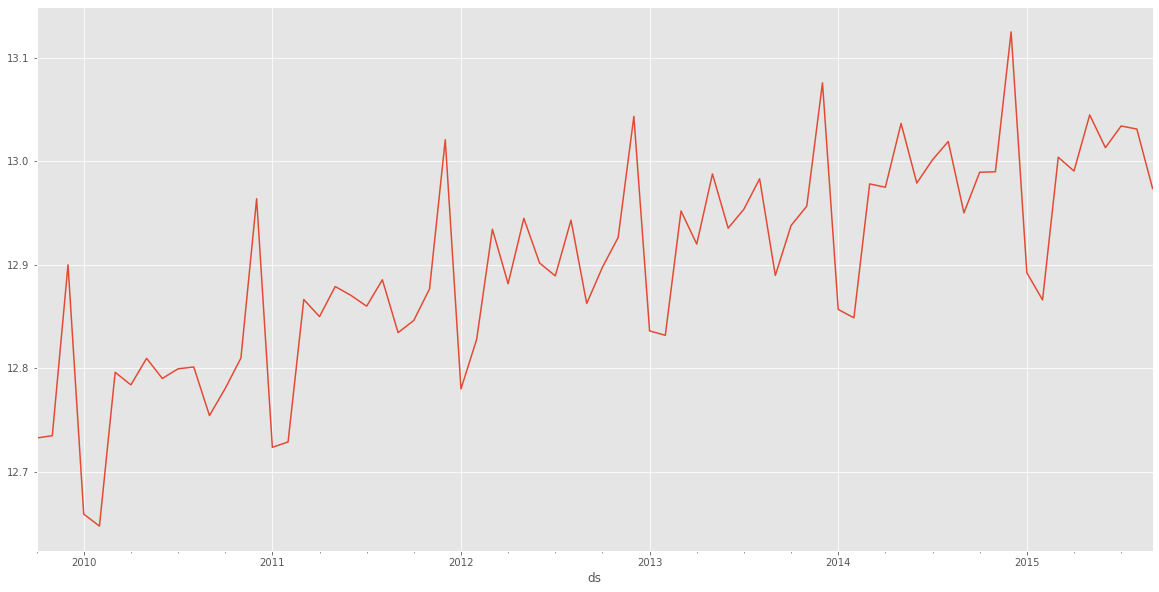

In [13]:
df.set_index('ds').y.plot().get_figure()

In [14]:
### Running prophet in our data

In [16]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df);

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


#### Forecasting is useless unless you can look into the future, so we need to add some future dates to our dataframe. 
#### I tried to forecast 2 years into the future, so I'll built a future dataframe with 24 periods since we are working with monthly data.

In [17]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


In [18]:
forecast = model.predict(future)

In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
91,2017-04-30,1.049453,12.666169,13.475116,0.666639,1.473334,12.001841,12.001841,12.001841,11.987007,...,-0.016038,-0.016038,-0.016038,0.030872,0.030872,0.030872,0.0,0.0,0.0,13.051294
92,2017-05-31,1.050992,12.646565,13.516527,0.636652,1.504067,12.011569,12.011569,12.011569,11.987007,...,0.011240,0.011240,0.011240,0.013322,0.013322,0.013322,0.0,0.0,0.0,13.062561
93,2017-06-30,1.052482,12.603017,13.539531,0.604683,1.537030,12.005339,12.005339,12.005339,11.987007,...,0.000166,0.000166,0.000166,0.018166,0.018166,0.018166,0.0,0.0,0.0,13.057821
94,2017-07-31,1.054021,12.593752,13.594964,0.571201,1.569261,12.023015,12.023015,12.023015,11.987007,...,-0.000827,-0.000827,-0.000827,0.036835,0.036835,0.036835,0.0,0.0,0.0,13.077036
95,2017-08-31,1.055561,12.504886,13.575550,0.539106,1.611749,11.964519,11.964519,11.964519,11.987007,...,0.009229,0.009229,0.009229,-0.031717,-0.031717,-0.031717,0.0,0.0,0.0,13.020080


#### We really only want to look at yhat, yhat_lower, and yhat_upper

In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,13.051294,12.666169,13.475116
92,2017-05-31,13.062561,12.646565,13.516527
93,2017-06-30,13.057821,12.603017,13.539531
94,2017-07-31,13.077036,12.593752,13.594964
95,2017-08-31,13.020080,12.504886,13.575550


#### Prophet has a plotting mechanism. This plot functionality draws the original data (black dots), the model (blue line), and the error of the forecast (shaded blue area).

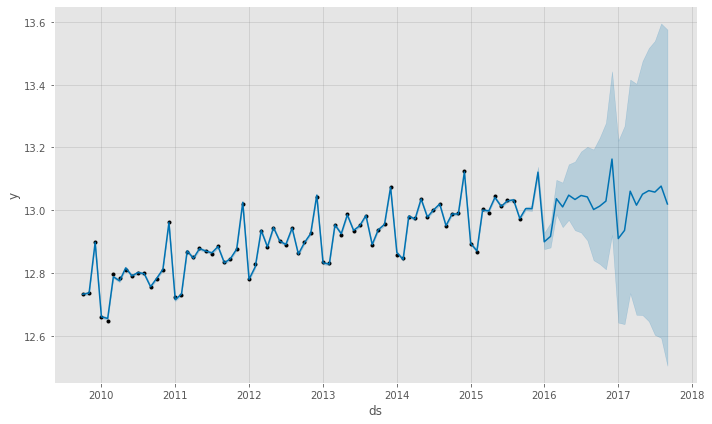

In [21]:
model.plot(forecast);

### Visualizing Prophet Model

#### Replace the indexes with original one

In [22]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

#### combine the original data and our forecast model data

In [23]:
viz_df = sales_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [24]:
viz_df.head()

,sales,yhat,yhat_lower,yhat_upper
2009-10-01,338630.0,12.732678,12.728205,12.737174
2009-11-01,339386.0,12.736238,12.731643,12.740895
2009-12-01,400264.0,12.897750,12.893196,12.902534
2010-01-01,314640.0,12.660705,12.656223,12.665336
2010-02-01,311022.0,12.655329,12.650727,12.659760


#### the data has been joined correctly but the scales of our original data (sales) and our model (yhat) are different. So let's rescale the yhat column to get the same scale using numpy exp()

In [25]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [26]:
viz_df.head()

,sales,yhat,yhat_lower,yhat_upper,yhat_rescaled
2009-10-01,338630.0,12.732678,12.728205,12.737174,338634.800190
2009-11-01,339386.0,12.736238,12.731643,12.740895,339842.675538
2009-12-01,400264.0,12.897750,12.893196,12.902534,399412.455819
2010-01-01,314640.0,12.660705,12.656223,12.665336,315118.916733
2010-02-01,311022.0,12.655329,12.650727,12.659760,313429.318251


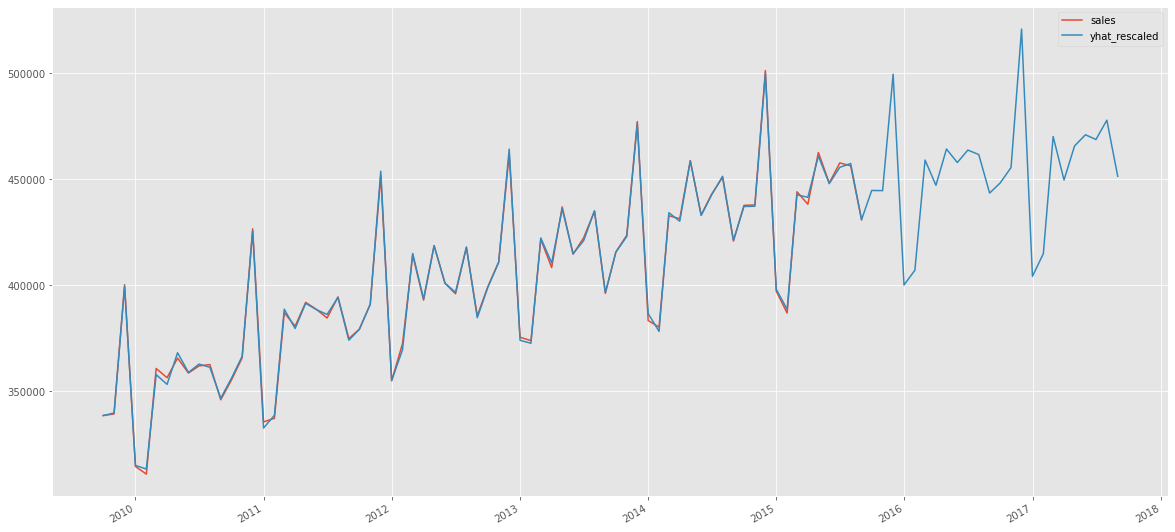

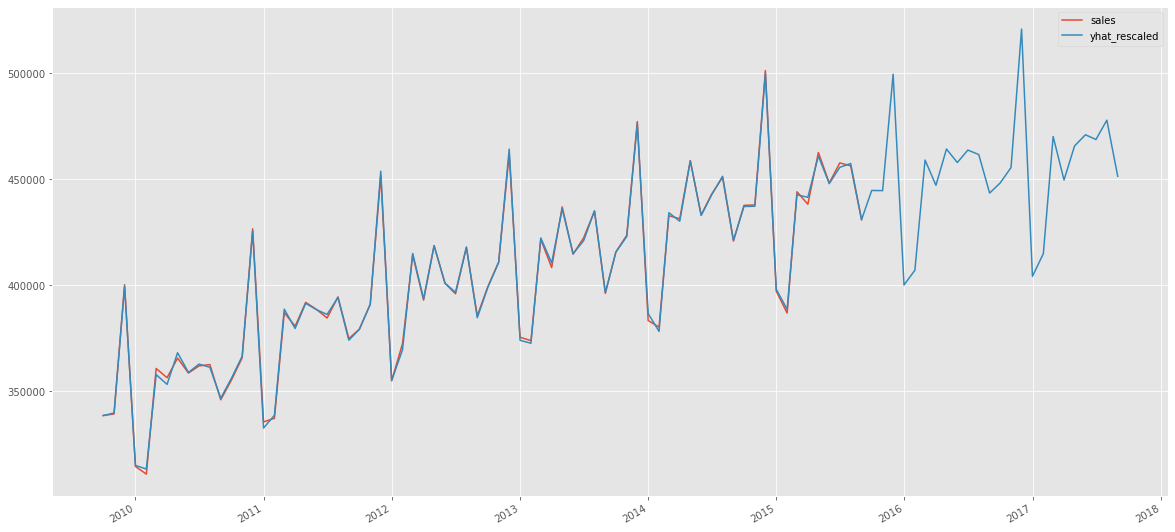

In [27]:
viz_df[['sales', 'yhat_rescaled']].plot().get_figure()

#### the model (blue) is pretty good when plotted against the actual signal (orange) but I like to make my visualizations a little easier to understand. To build a better' visualization, lets go back to our original sales_df and forecast dataframes.

##### First, let ensure the original sales data and model data charts are connected

In [28]:
sales_df.index = pd.to_datetime(sales_df.index) #make sure our index as a datetime object
connect_date = sales_df.index[-2] #select the 2nd to last date

#### Using the connect_date we can now grab only the model data that after that date 

In [31]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [32]:
predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2015-09-01,1.019311,12.969180,12.978293,1.019311,1.019311,11.954344,11.954344,11.954344,11.987007,11.987007,...,0.002152,0.002152,0.002152,-0.034815,-0.034815,-0.034815,0.0,0.0,0.0,12.973656
2015-09-30,1.020751,12.999646,13.010116,1.019941,1.021816,11.984463,11.984463,11.984463,11.987007,11.987007,...,0.011240,0.011240,0.011240,-0.013784,-0.013784,-0.013784,0.0,0.0,0.0,13.005214
2015-10-31,1.022291,12.997913,13.013549,1.015761,1.029994,11.982726,11.982726,11.982726,11.987007,11.987007,...,-0.005922,-0.005922,-0.005922,0.001640,0.001640,0.001640,0.0,0.0,0.0,13.005017
2015-11-30,1.023781,13.107065,13.138296,1.011063,1.039497,12.097633,12.097633,12.097633,11.987007,11.987007,...,-0.000827,-0.000827,-0.000827,0.111453,0.111453,0.111453,0.0,0.0,0.0,13.121413
2015-12-31,1.025320,12.876222,12.928074,1.001988,1.053300,11.874299,11.874299,11.874299,11.987007,11.987007,...,0.009229,0.009229,0.009229,-0.121936,-0.121936,-0.121936,0.0,0.0,0.0,12.899619


#### Now, let's build a dataframe to use in our new visualization.

In [33]:
viz_df = sales_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

In [34]:
viz_df.head()

,sales,yhat,yhat_lower,yhat_upper,yhat_scaled
2009-10-01,338630.0,NaN,NaN,NaN,NaN
2009-11-01,339386.0,NaN,NaN,NaN,NaN
2009-12-01,400264.0,NaN,NaN,NaN,NaN
2010-01-01,314640.0,NaN,NaN,NaN,NaN
2010-02-01,311022.0,NaN,NaN,NaN,NaN


#### let's rescale data to fix the NaN

In [35]:
viz_df.tail()

,sales,yhat,yhat_lower,yhat_upper,yhat_scaled
2017-04-30,NaN,13.051294,12.666169,13.475116,465698.742436
2017-05-31,NaN,13.062561,12.646565,13.516527,470975.408676
2017-06-30,NaN,13.057821,12.603017,13.539531,468748.304485
2017-07-31,NaN,13.077036,12.593752,13.594964,477842.406113
2017-08-31,NaN,13.020080,12.504886,13.575550,451386.631699


#### Now, let's plot everything to get the 'final' visualization of our sales data and forecast with errors.

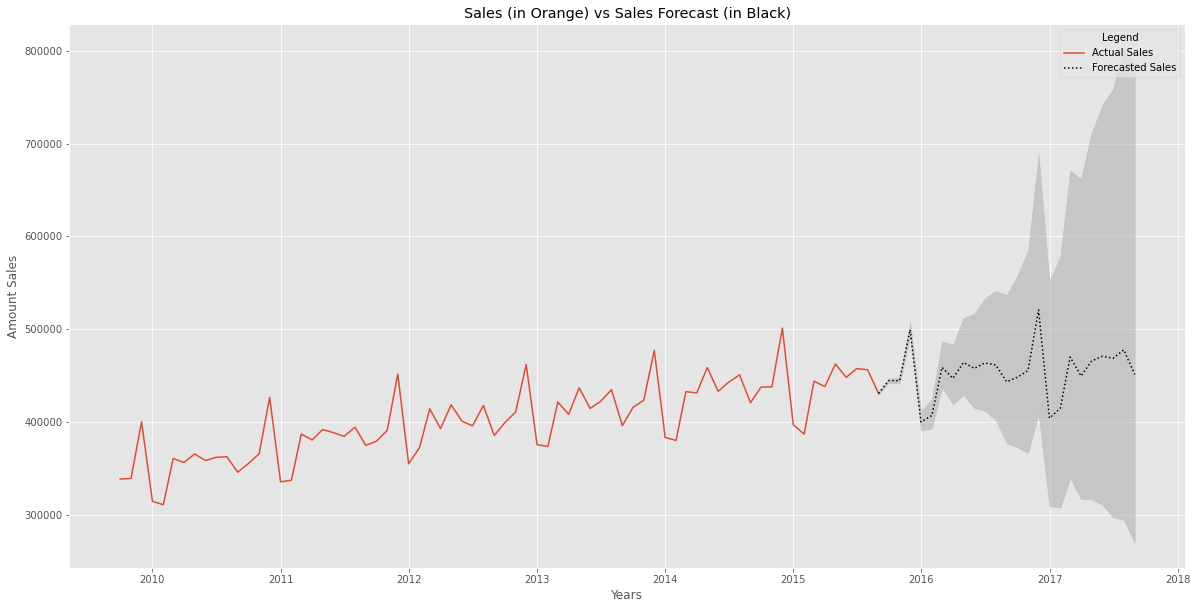

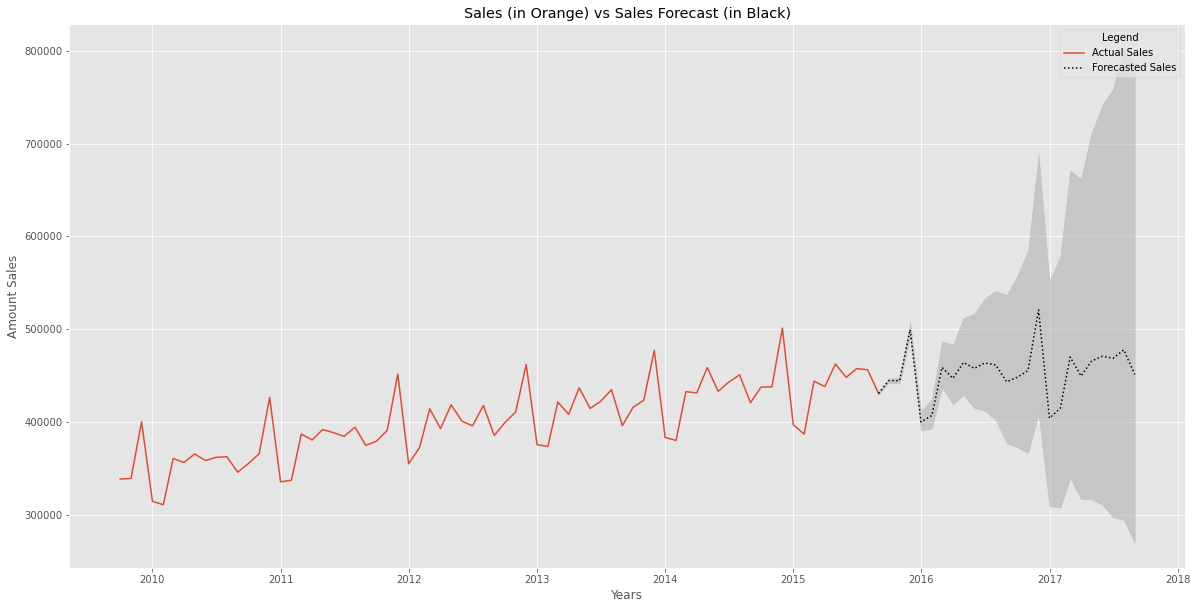

In [37]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.sales, label="Actual Sales")
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':', label= "Forecasted Sales")
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Sales (in Orange) vs Sales Forecast (in Black)')
ax1.set_ylabel('Amount Sales')
ax1.set_xlabel('Years')

ax1.legend(title="Legend") #get the legend
fig

#### This visualization is much better (in my opinion) than the default fbprophet plot. It is much easier to quickly understand and describe what's happening. The orange line is actual sales data and the black dotted line is the forecast. The gray shaded area is the uncertainty estimation of the forecast.

